# Building a forecasting model for a stock market

###Importing all the libraries and loading the data from yahoo

In [ ]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define stock ticker and date range
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2022-01-01"

# Download stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Select the "Close" column
df = data["Close"]


[*********************100%***********************]  1 of 1 completed


### Visualizing to give a perspective of the stock graph

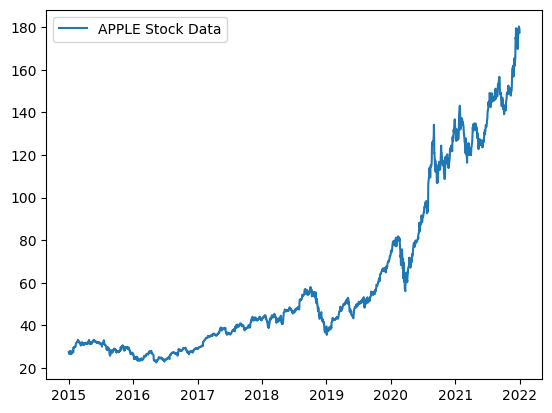

In [ ]:
# plotting the stock data to visualize the data obtained
plt.plot(df, label="APPLE Stock Data")
plt.legend()
plt.show()
plt.close()

### Splitting the dataset and fitting it to the ARIMA model

In [ ]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

The AIC value is :3838.9433539550164


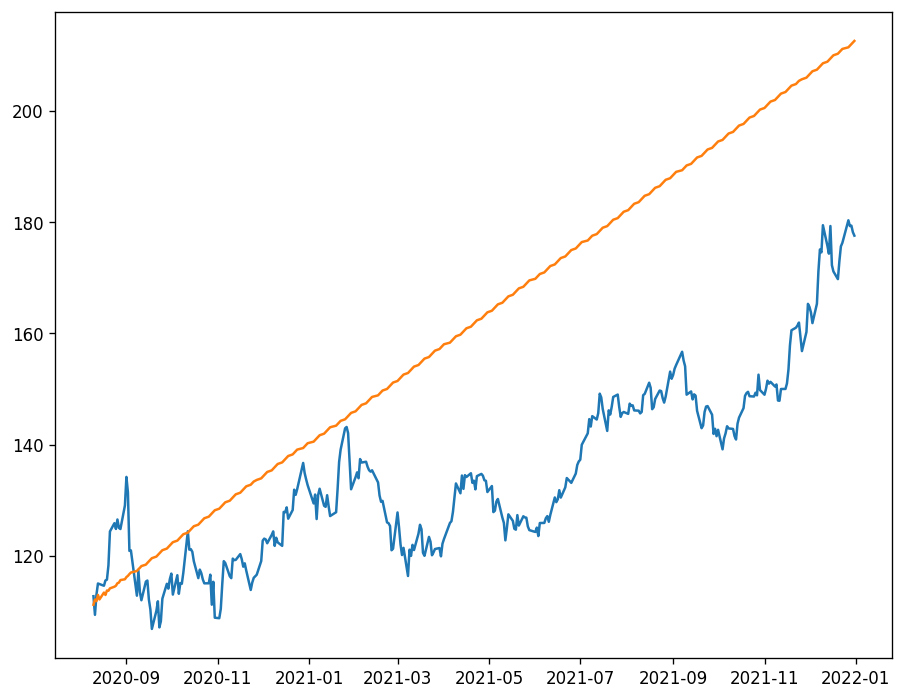

In [ ]:
# best value order=(8,2,7)
model = ARIMA(train_data, order=(8, 2, 7))
fitted_model = model.fit()

aic = fitted_model.aic
forecast = fitted_model.forecast(len(test_data))
print(f"The AIC value is :{aic}")
plt.plot(test_data.index,test_data, label="Actual Data")
plt.plot(test_data.index, forecast.values,label="Forecast")
plt.show()

#### Following are experimentations of ARIMA and SARIMAX

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
df = data["Close"]
model = pm.auto_arima(df.values, start_p=5, start_q=5,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=16.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6181.730, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6168.774, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6169.289, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6186.285, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6170.287, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6169.911, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6171.883, Time=1.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6174.636, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 19.197 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1763
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -3057.537
Date:                Mon, 01 May 2023   AIC                           6131.075
Time:                        14:44:11   BIC                           6174.869
Sample:                             0   HQIC                          6147.258
                               - 1763                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0067      0.054      0.124      0.901      -0.099       0.113
ar.L1         -0.8912      0.171     -5.200      0.000      -1.227      -0.555
ar.L2          0.8391      0.320      2.622      0.0

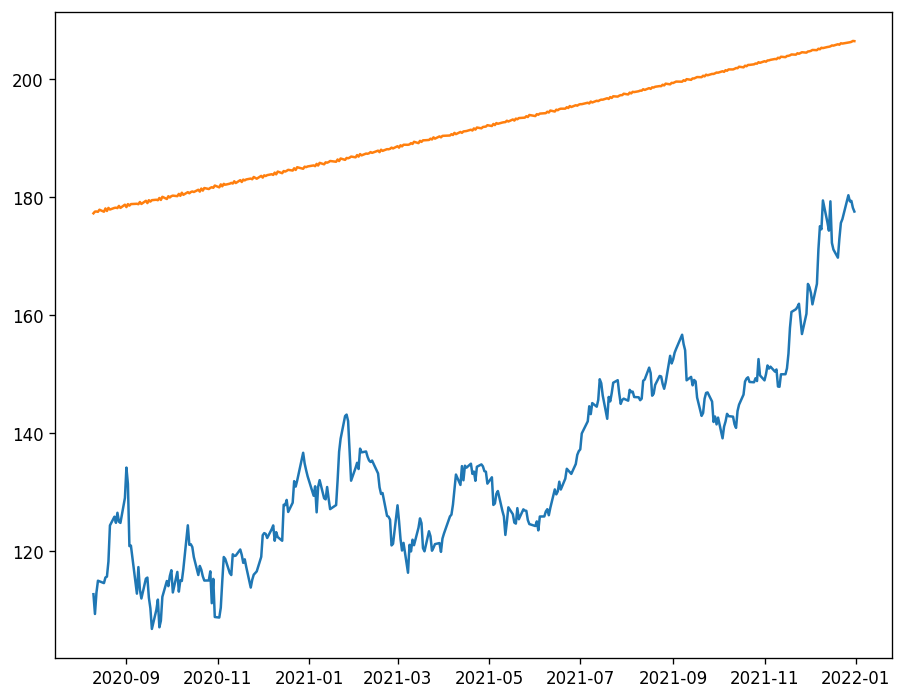

In [ ]:
print(model.summary())
aic = model.aic
forecast = model.predict(len(test_data))
print(f"The AIC value is :{aic}")
plt.plot(test_data.index,test_data, label="Actual Data")
plt.plot(test_data.index, forecast,label="Forecast")
plt.show()

In [ ]:
sxmodel = pm.auto_arima(df, exogenous=df,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=8, max_q=8, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=25.26 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10217.905, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6855.482, Time=3.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8790.131, Time=4.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10304.743, Time=0.24 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7221.204, Time=0.81 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6591.746, Time=11.61 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=55.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=18.94 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=10189.463, Time=7.70 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6584.545, Time=13.49 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=6849.290, Time=6.68 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=46.23 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=26.16 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1763
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -3286.272
Date:                            Mon, 01 May 2023   AIC                           6584.545
Time:                                    15:09:38   BIC                           6617.352
Sample:                                         0   HQIC                          6596.672
                                           - 1763                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0769      0.040      1.916      0.055      -0.002       0.156
ar.L1          0.8928      0.014     65.264      0.000       0.866       0.920
ar.L2          0.0726      0.013      5.379      0.000       0.046       0.099
ar.S.L12      -0.6304      0.013    -47.509      0.000      -0.656      -0.604
ar.S.L24      -0.3873      0.013    -29.771      0.000      -0.413      -0.362
sigma2         2.4867      0.040     61.958      0.000       2.408       2.565
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4936.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              27.04   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


The AIC value is :<bound method ARIMA.aic of ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)>


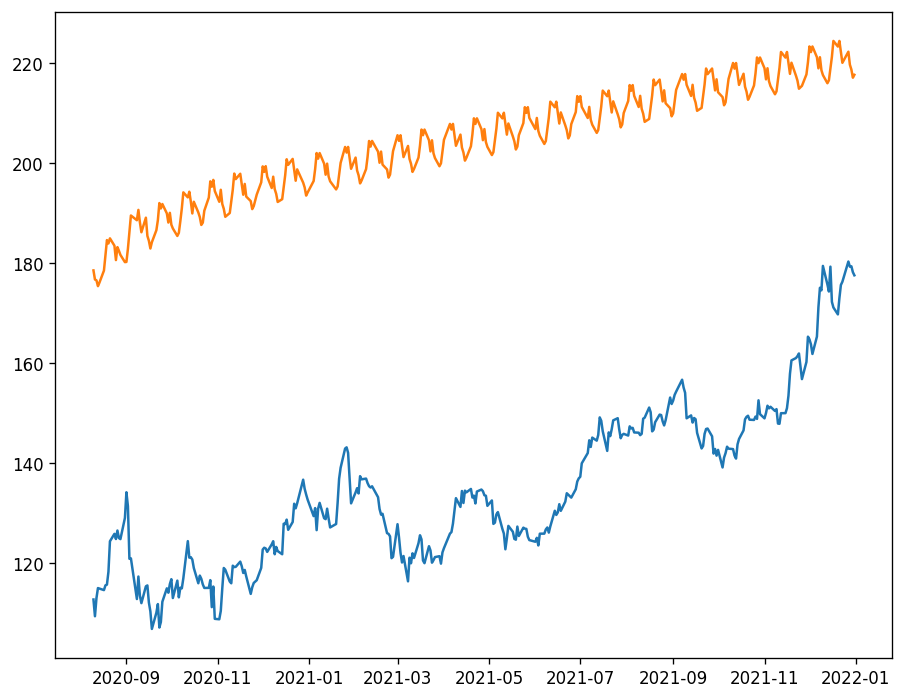

In [ ]:
aic = sxmodel.aic
forecast = sxmodel.predict(len(test_data))
print(f"The AIC value is :{aic}")
plt.plot(test_data.index,test_data, label="Actual Data")
plt.plot(test_data.index, forecast,label="Forecast")
plt.show()

### Loaind the datset to get quaterly result dates as they have seasonality

In [ ]:
import pandas as pd
import yfinance as yf

# Set the stock symbol and earnings call dates
symbol = 'AAPL'
earnings_dates = ['2022-01-25', '2022-04-26', '2022-07-26', '2022-10-25']

# Retrieve the historical data for the stock
stock_data = yf.download(symbol, start='2022-01-01', end='2022-12-31')

# Filter the data to only include the earnings call dates
quarterly_data = stock_data.loc[earnings_dates]

# Print the filtered data
print(quarterly_data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-25  158.979996  162.759995  157.020004  159.779999  158.615829   
2022-04-26  162.250000  162.339996  156.720001  156.800003  155.855881   
2022-07-26  152.259995  153.089996  150.800003  151.600006  150.908600   
2022-10-25  150.089996  152.490005  149.360001  152.339996  151.855850   

               Volume  
Date                   
2022-01-25  115798400  
2022-04-26   95623200  
2022-07-26   55138700  
2022-10-25   74732300  


In [ ]:
sxmodel = pm.auto_arima(df, exogenous=quarterly_data["Close"],
                           start_p=8, start_q=7,
                           test='adf',
                           max_p=8, max_q=8, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(8,0,7)(0,1,1)[12] intercept   : AIC=inf, Time=77.88 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10217.905, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6855.482, Time=3.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8790.131, Time=4.64 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10304.743, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7221.204, Time=0.44 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6591.746, Time=11.32 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=54.48 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=18.98 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=10189.463, Time=9.75 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6584.545, Time=13.00 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=6849.290, Time=4.72 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=45.80 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=26.18 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1763
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -3286.272
Date:                            Mon, 01 May 2023   AIC                           6584.545
Time:                                    15:28:51   BIC                           6617.352
Sample:                                         0   HQIC                          6596.672
                                           - 1763                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0769      0.040      1.916      0.055      -0.002       0.156
ar.L1          0.8928      0.014     65.264      0.000       0.866       0.920
ar.L2          0.0726      0.013      5.379      0.000       0.046       0.099
ar.S.L12      -0.6304      0.013    -47.509      0.000      -0.656      -0.604
ar.S.L24      -0.3873      0.013    -29.771      0.000      -0.413      -0.362
sigma2         2.4867      0.040     61.958      0.000       2.408       2.565
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4936.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              27.04   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


The AIC value is :<bound method ARIMA.aic of ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)>


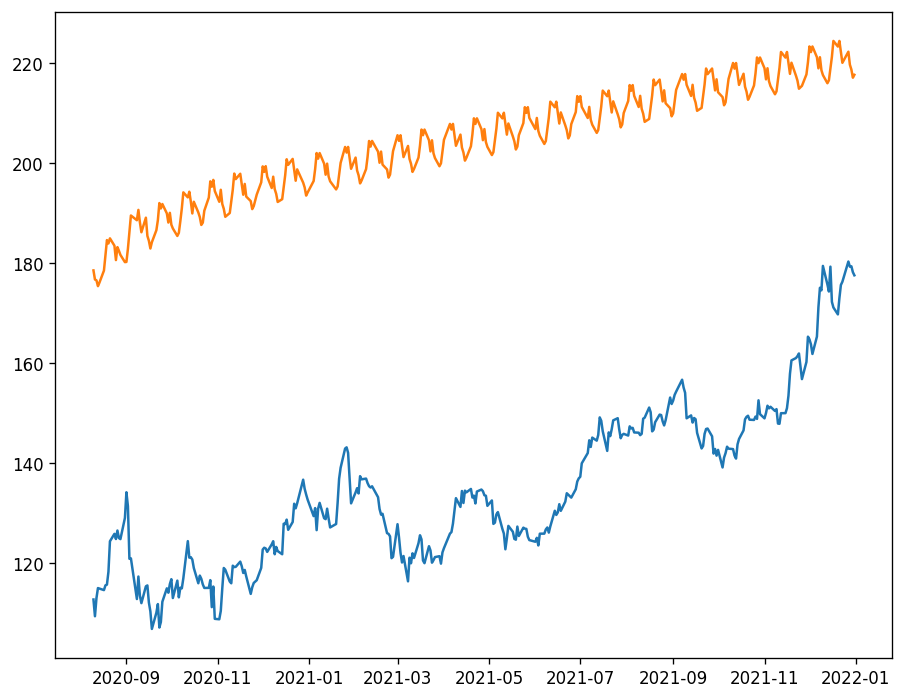

In [ ]:
aic = sxmodel.aic
forecast = sxmodel.predict(len(test_data))
print(f"The AIC value is :{aic}")
plt.plot(test_data.index,test_data, label="Actual Data")
plt.plot(test_data.index, forecast,label="Forecast")
plt.show()

### Building the LSTM Model to train and test the system

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the stock symbol and the start and end dates for the historical data
symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2022-05-01"

# Retrieve the historical data for the stock from Yahoo Finance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Create a new dataframe with just the closing price
df = pd.DataFrame(stock_data['Close'])

# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
time_steps = 60
n_features = 1

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], n_features))
    return X, y

X_train, y_train = create_dataset(train_data_scaled, time_steps)
X_test, y_test = create_dataset(test_data_scaled, time_steps)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the scaled data back to the original values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])


[*********************100%***********************]  1 of 1 completed
18/18 [==============================] - 0s 11ms/step


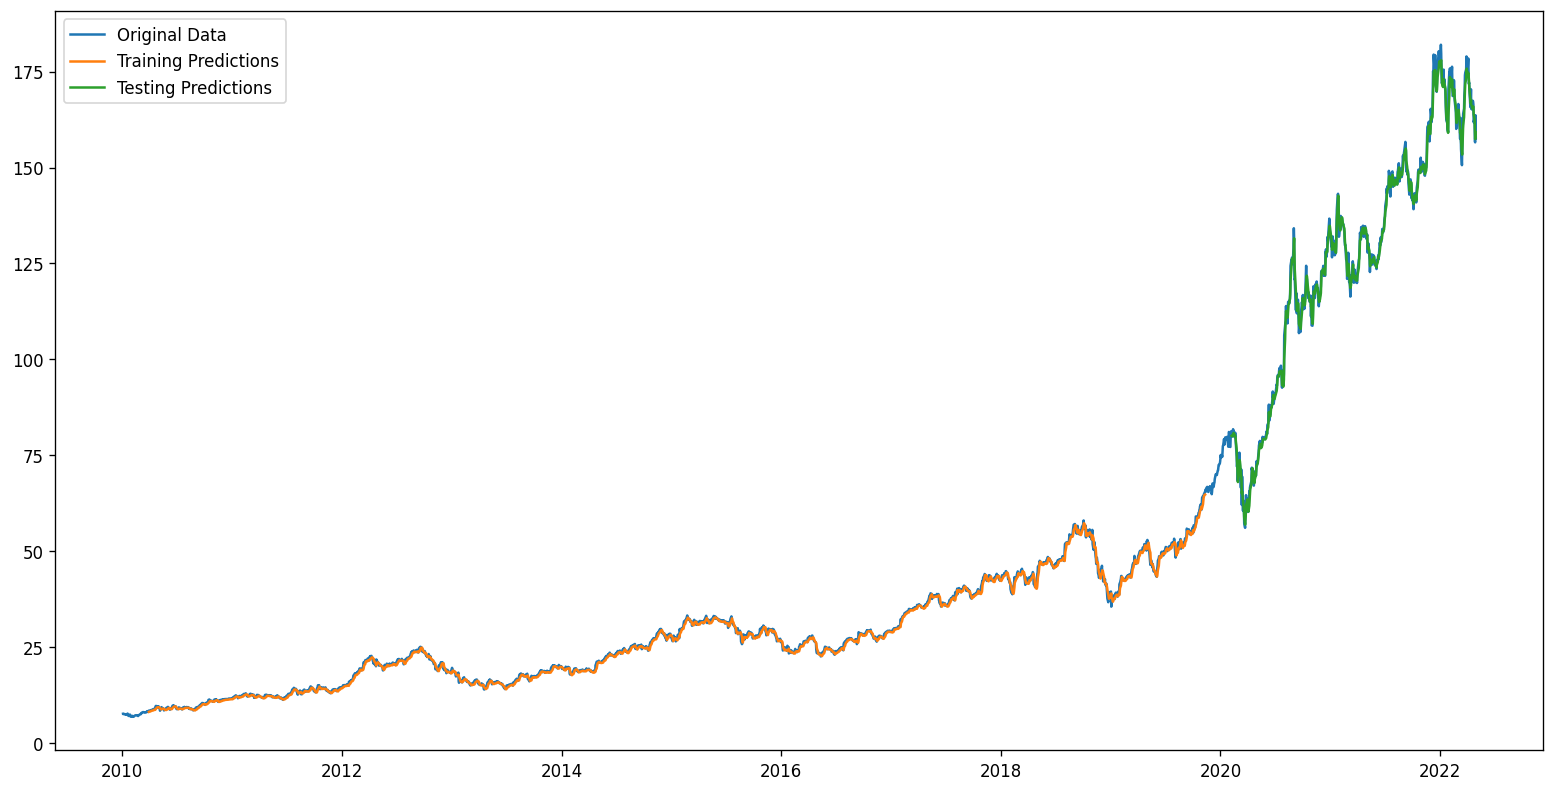

In [ ]:

# Reshape the data to plot the predicted values against the original values
train_predictions_plot = np.empty_like(df)
train_predictions_plot[:, :] = np.nan
train_predictions_plot[time_steps:len(train_predictions)+time_steps, :] = train_predictions

test_predictions_plot = np.empty_like(df)
test_predictions_plot[:, :] = np.nan
test_predictions_plot[len(train_predictions)+(time_steps*2)-1:len(df)-1, :] = test_predictions

# Plot the predicted values against the original values
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(df.index, train_predictions_plot, label='Training Predictions')
plt.plot(df.index, test_predictions_plot, label='Testing Predictions')
plt.legend()
plt.show()


### The Final Best LSTM model optimized for training purposes and slight adjustments to evaluation and plotting an interactive graph to get a better look at the predicted data

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.graph_objs as go

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get the data
data = yf.download(tickerSymbol, period='max', interval='1d')

# Define the train and test data
train_data = data[:'2019']
test_data = data['2020':]

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_data['Close'].values.reshape(-1,1))

# Prepare the training data for the LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 60
X_train, y_train = create_dataset(train_data_normalized, look_back)

# Reshape the data to be 3-dimensional for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=25, batch_size=64)

# Prepare the test data for prediction`
inputs = data['Close'][len(data) - len(test_data) - look_back:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(look_back, inputs.shape[0]):
    X_test.append(inputs[i-look_back:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Use the LSTM model to make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
train = go.Scatter(x=train_data.index, y=train_data['Close'], name='Train')
test = go.Scatter(x=test_data.index, y=test_data['Close'], name='Test')
pred = go.Scatter(x=test_data.index, y=predictions.flatten(), name='Prediction')

fig = go.Figure(data=[train, test, pred])
fig.update_layout(title=f'{tickerSymbol} Stock Price Prediction using LSTM', xaxis_title='Date', yaxis_title='Price')
fig.show()



[*********************100%***********************]  1 of 1 completed
Epoch 1/25
153/153 [==============================] - 19s 90ms/step - loss: 0.0012
Epoch 2/25
153/153 [==============================] - 18s 117ms/step - loss: 7.3335e-05
Epoch 3/25
153/153 [==============================] - 14s 91ms/step - loss: 6.6980e-05
Epoch 4/25
153/153 [==============================] - 14s 92ms/step - loss: 5.9843e-05
Epoch 5/25
153/153 [==============================] - 14s 92ms/step - loss: 5.9601e-05
Epoch 6/25
153/153 [==============================] - 14s 93ms/step - loss: 5.1354e-05
Epoch 7/25
153/153 [==============================] - 14s 93ms/step - loss: 4.6477e-05
Epoch 8/25
153/153 [==============================] - 15s 95ms/step - loss: 5.2394e-05
Epoch 9/25
153/153 [==============================] - 15s 96ms/step - loss: 4.8606e-05
Epoch 10/25
153/153 [==============================] - 14s 92ms/step - loss: 4.1099e-05
Epoch 11/25
153/153 [==============================] - 14s 92ms

##---------END of FILE ---------